<a href="https://colab.research.google.com/github/NajlaaNawaii/Karpathy-s-Neural-Networks-/blob/main/Building_Micrograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Derivatives
- When I differentiate a function with respect to a particular variable, I'm determining how much the function's value changes when I slightly adjust that specific variable.

In [2]:
class Value:

  def __init__(self,data,_children=(),_op="",label=""):
    self.data=data
    self._prev=set(_children)
    self.grad=0
    self._op=_op
    self.label=label

#This special method to define a string representation
  def __repr__(self):
    return f"Value(data={self.data})"

#This is a special method to define an addition operation
  def __add__(self,other):
    return Value(self.data + other.data, (self,other),"+")

#This is a special method to define a multiplication operation
  def __mul__(self,other):
    return Value(self.data * other.data, (self,other),"*")


  def tanh(self):
    x=self.data
    output=(np.exp(2*x)-1)/(np.exp(2*x)+1)
    output=Value(output, (self,),"tanh")
    return output








Value(data=-8.0)

In [12]:
a=Value(2.0,label="a")
b=Value(-3.0,label="b")
c=Value(10.0,label="c")
f=Value(-2.0,label="f")
e=a*b; e.label="e"
d=e+c; d.label="d"
L = d*f; L.label="L"
L



Value(data=-8.0)

#Visualization code that I didn't write


In [13]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})  # LR = left to right

    nodes, edges = trace(root)

    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name=uid, label="{ %s | data %.4f |grad %.4f}" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name=uid + n._op, label=n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot


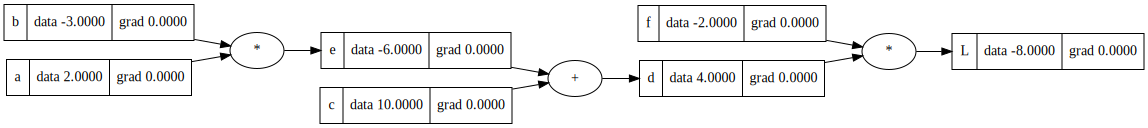

In [14]:
draw_dot(L)

In [5]:
import numpy as np

#Neuron_BackPropagation_Manually

In [34]:
#Inputs
x1=Value(2.0,label="x1")
x2=Value(0.0,label="x2")

#weights
w1=Value(-3.0,label="w1")
w2=Value(1.0,label="w2")

#bias
b=Value(6.8813735870195432,label="b")


#input_layer
x1w1=x1*w1; x1w1.label="x1w1"
x2w2=x2*w2; x2w2.label="x2w2"

# output
summed=x1w1+x2w2; summed.label="summed"
biased_sum=summed + b; biased_sum.label="biased_sum"

#activated_output
activated_output= biased_sum.tanh(); activated_output.label="activated_output"

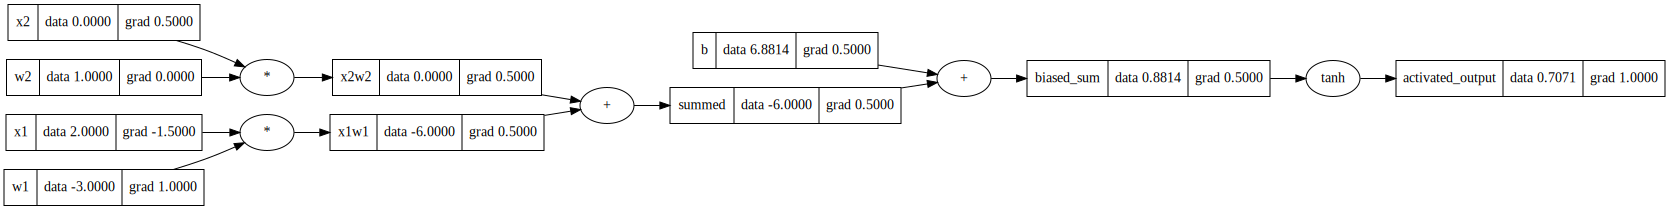

In [36]:
draw_dot(activated_output)

In [35]:
#VERY IMPORTANT! BASE CASE!
activated_output.grad=1.0

#these expressions exectute the attribute "_backward" associated with each object which calls the function itself
activated_output._backward()
biased_sum._backward()
summed._backward()
x1w1._backward()
x2w2._backward()
w1._backward()
w2._backward()
b._backward()

In [29]:
# #output_process
# activated_output.grad=1.0
# #3rd_process
# # biased_sum.grad= 1 - (biased_sum.data)**2
# biased_sum.grad = .5
# #2nd_process
# summed.grad= activated_output.grad * biased_sum.grad * 1
# b.grad= activated_output.grad * biased_sum.grad * 1
# #1st_process
# x1w1.grad= summed.grad * 1
# x2w2.grad= summed.grad * 1

# #input
# x1.grad=x1w1.grad * w1.data
# x2.grad=x2w2.grad * w2.data
# w1.grad=x1w1.grad * x1.data
# w2.grad=x2w2.grad * x2.data


#Adding the backward

In [33]:
class Value:

  def __init__(self,data,_children=(),_op="",label=""):
    self.data=data
    self._prev=set(_children)
    #attribute that the backward function is assigned to, talk more???
    self._backward=lambda:None
    self.grad=0
    self._op=_op
    self.label=label

#This special method to define a string representation
  def __repr__(self):
    return f"Value(data={self.data})"

#This is a special method to define an addition operation
  def __add__(self,other):
    output=Value(self.data + other.data, (self,other),"+")
    def _backward():
      self.grad = 1.0 * output.grad
      other.grad = 1.0 * output.grad
    output._backward= _backward
    return output

#This is a special method to define a multiplication operation
  def __mul__(self,other):
    output=Value(self.data * other.data, (self,other),"*")
    def _backward():
      self.grad = other.data * output.grad
      other.grad = self.data * output.grad

    output._backward=_backward
    return output


  def tanh(self):
    x=self.data
    tanh_output=(np.exp(2*x)-1)/(np.exp(2*x)+1)
    output=Value(tanh_output, (self,),"tanh")
    def _backward():
      self.grad=(1-tanh_output**2) * output.grad
    output._backward=_backward
    return output




